# Planck's law

Let's briefly introduce the main aspects of the theory combining some Wikipedia articles. Links below.

Planck's law describes the spectral density of electromagnetic radiation emitted by a black body in thermal equilibrium at a given temperature, when there is no net flow of matter or energy between the body and its environment.

Planck's law can be written in terms of the spectral energy density. These distributions have units of energy per volume per spectral unit.

\begin{equation}
\rho (\lambda, T) = \frac{8 \pi h c}{\lambda^5 \left(e^{\frac{hc}{\lambda k_B T}} - 1\right)}
\label{eq:planck}
\end{equation}

where $k_B$ is the Boltzmann constant, $h$ is the Planck constant, and $c$ is the speed of light in the medium, whether material or vacuum.

Black-body radiation is the thermal electromagnetic radiation within or surrounding a body in thermodynamic equilibrium with its environment, emitted by a black body (an idealized opaque, non-reflective body). It has a specific spectrum of wavelengths, inversely related to intensity that depend only on the body's temperature, which is assumed for the sake of calculations and theory to be uniform and constant.

References: [Planck's law](https://en.wikipedia.org/wiki/Planck%27s_law), [Black-body radiation](https://en.wikipedia.org/wiki/Black-body_radiation), [Energy density](https://en.wikipedia.org/wiki/Energy_density)

# About this piece of software

A simple script to plot the Planck's law.

Please, run the following cell so that the script can be imported (the notebook must be in the same folder as the script). Then, run each code cell after reading their meaning.

In [1]:
import planck

The following must be imported so that we can use them in the examples.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# the following must be imported for interactive plots
from ipywidgets import interact, interactive, fixed

Now let's test the methods of the planck module.

We can use the `planck_energy_density` function to calculate the energy density at a given wavelength at a given temperature. Remember that the module uses SI units. For example, at 500 nm and 7000 K:

In [3]:
planck.planck_energy_density(500.0e-9, 7000)

2662877.9681075383

Usually we want the energy density at a given wavelength _range_ in order to plot a distribution. The function accepts wavelengths arrays.

Let's create a wavelength array with 10 values between 400 and 800 nm and calculate the energy density values at 5000 K:

In [4]:
lambda_example = np.linspace(400e-9, 800e-9, 10)

energy_density_5000K_example = planck.planck_energy_density(lambda_example, 5000)
energy_density_5000K_example

array([366503.0978276 , 444693.41497869, 498031.66222402, 527350.02877923,
       536480.59647891, 530167.30064167, 512920.45172757, 488528.23748235,
       459942.12455755, 429341.64031601])

Great. Now we have data points that can be plotted. Let's create a figure and uses Matplotlib to draft a plot.

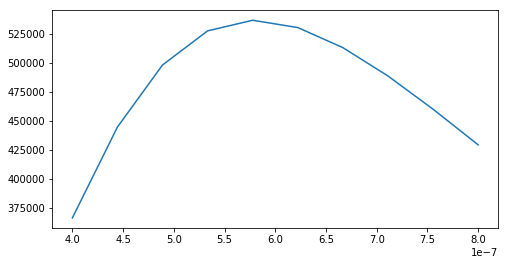

In [5]:
# plot draft

fig_ex1 = plt.figure(figsize=(8,4))
ax_ex1 = fig_ex1.add_subplot(111)

ax_ex1.plot(lambda_example, energy_density_5000K_example)
plt.show()

Yeah, it resembles a Planck distribution. You can modify the plot using Matplotlib's methods to be more suitable for presentation (axes labels, wavelengths in nanometers etc). You probably should increase the number of points to get a smoother plot.

However, the planck module has a function for plots that can do all this! 

The function receives a wavelength array and a temperature array/list. So, let's plot the same range again but using it and increasing the number of data points to 1000 (probably overkill but hey it's a computer doing math).

The function always get the current axis to plot, so we are going to create a figure with axes before calling the function.

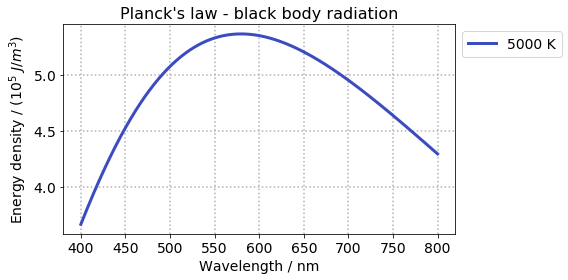

In [6]:
lambda_example = np.linspace(400e-9, 800e-9, 1000)

fig_ex2 = plt.figure(figsize=(8,4))
ax_ex2 = fig_ex2.add_subplot(111)

planck.plot_planck(lambda_example,[5000])

The function generates the labels and a decent scale. The wavelength unit is nanometers by default.

Since the function receives a temperature _list_, more than one value can be passed. Let's test this feature passing 5000 and 6000 K.


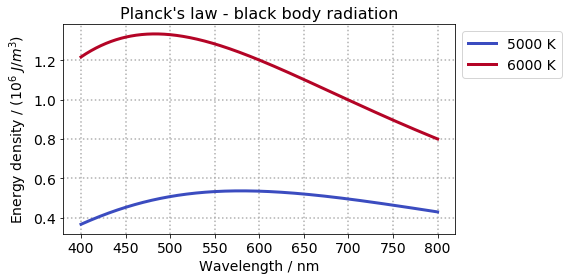

In [7]:
fig_ex3 = plt.figure(figsize=(8,4))
ax_ex3 = fig_ex3.add_subplot(111)

planck.plot_planck(lambda_example,[5000, 6000])

Great. Let's increase the wavelength range and pass more temperatures using a numpy array:

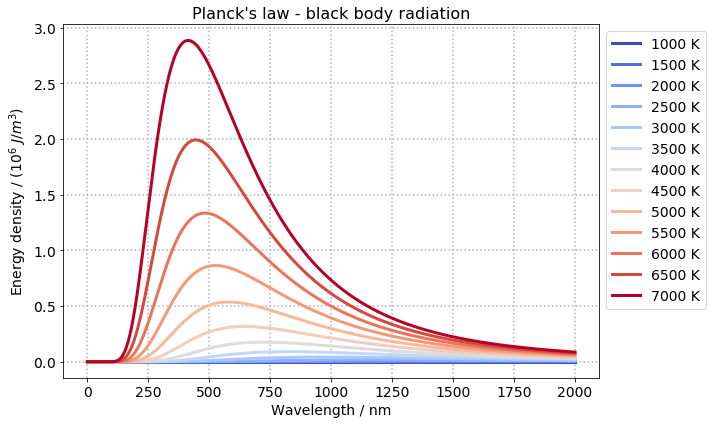

In [8]:
lambda_array = np.linspace(1.0e-9, 2.0e-6, 1000) 
temperature_array = np.arange(1000, 7001, 500)

fig1 = plt.figure(figsize=(10, 6))
ax = fig1.add_subplot(111)
planck.plot_planck(lambda_array, temperature_array)

By default, the method uses the coolwarm [colormap](https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html). Let's change it to gist_rainbow:

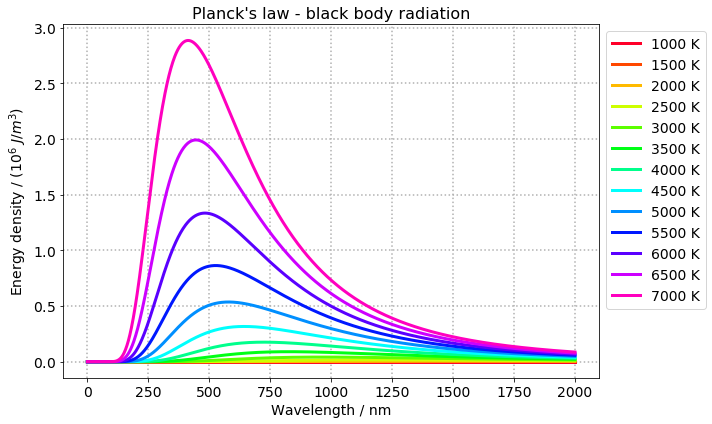

In [9]:
fig2 = plt.figure(figsize=(10, 6))
ax = fig2.add_subplot(111)

planck.plot_planck(lambda_array, temperature_array, colors=plt.cm.gist_rainbow)

The planck module also has a function that can be called _before_ the plot. It's the `plot visible` one and it adds a visible spectrum in the plot background so that we can see lower temperatures bodies with maximum wavelength emission near the red (or even before, infrared) and higher ones towards the violet and beyond (ultraviolet):

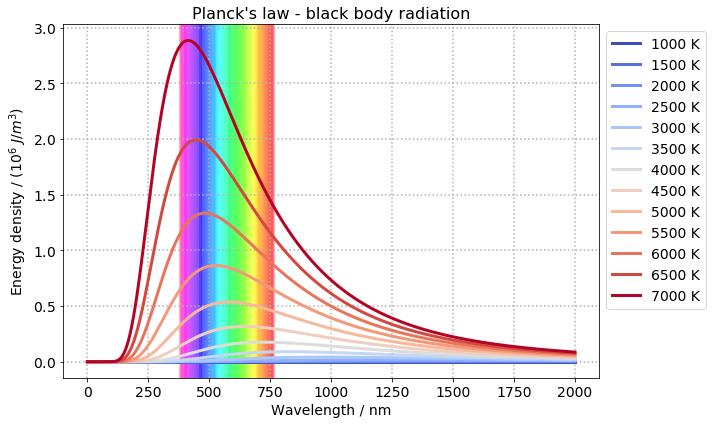

In [10]:
fig3 = plt.figure(figsize=(10, 6))
ax = fig3.add_subplot(111)

planck.plot_visible()
planck.plot_planck(lambda_array, temperature_array)

Last but not the least, the module has a function to  interactive plots: `plot_planck_interactive`. This function must be passed to the `interactive` method from ipywidgets package. A wavelength array must also be passed as a fixed argument. The temperature must be passed as follows with a initial value (500 in the example), a final value (8000) and a step (500).

In [11]:
lambda_array = np.linspace(1.0e-9, 3.0e-6, 1000) 
graph = interactive(planck.plot_planck_interactive,
                    wavelength_array=fixed(lambda_array),
                    temperature=(500,8000,500))
display(graph)

interactive(children=(IntSlider(value=500, description='temperature', max=8000, min=500, step=500), Output()),…

Let's change the values to see the effects.

In [12]:
lambda_array = np.linspace(200e-9, 900e-9, 1000) 
graph = interactive(planck.plot_planck_interactive,
                    wavelength_array=fixed(lambda_array),
                    temperature=(3000,9000,400))
display(graph)

interactive(children=(IntSlider(value=3000, description='temperature', max=9000, min=3000, step=400), Output()…